## Download a csv from a jupyter notebook

In [ ]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Practice GroupBy operations with Video Games Sales data

## Introduction

This lab focuses on grouping and aggregation using the Video Games Sales dataset. You'll be working with the dataset to practice the following skills:

- Grouping the data based on one or multiple columns using the groupby function.
- Applying built-in functions like ``mean``, ``sum``, ``size``, and describe to aggregated groups.
- Using different aggregation functions for different columns using ``.agg`` or ``.aggregate``, including custom defined functions.
- Applying advanced custom functions using ``.apply``.
- Utilizing the ``.transform`` function to apply transformations to groups while preserving the original DataFrame shape.

### The Dataset used

For this lab, we will be using the Video Games Sales dataset from Kaggle. The dataset contains information about video game sales, including the game title, platform, genre, publisher, and sales figures in different regions. It provides a comprehensive overview of the video game industry.

### Analysis and activities

In this lab, you will apply grouping and aggregation techniques to answer various questions about the video game sales dataset. You will group the data by different columns, calculate statistics such as mean and sum, analyze trends over time, identify top performers, and explore regional preferences for platforms, genres, and publishers.

Begin by going through the reading material and analysis sections of the lab notebook. Once you feel comfortable, proceed to the activities section to practice your skills and gain a deeper understanding of grouping and aggregating data with pandas.

In [1]:
import pandas as pd

In [2]:
games_sales_df = pd.read_csv('files/vgsales.csv')

In [3]:
games_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("video games dataframe size: ", games_sales_df.size)

#show the number of records (rows) in the dataframe
print("number of games: ", len(games_sales_df))

video games dataframe size:  182578
number of games:  16598


In [5]:
games_sales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

1. Calculate the total global sales for each ``Platform``

    Store the resulting series in the variable ``total_global_sales_by_platform``.

In [6]:
total_global_sales_by_platform = games_sales_df.groupby(['Platform']).sum()['Global_Sales']
total_global_sales_by_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

2. Find the top-selling genre based on global sales

    Note: The top-selling genre is the genre that has the maximum sum of ``Global_Sales``.

In [7]:
top_selling_genre = games_sales_df.groupby(['Genre']).sum()['Global_Sales'].sort_values(ascending = False)

In [8]:
games_sales_df.groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

3. Create a bar chart to visualize the sum of ``Global_Sales`` per ``Genre``

    Store the resulting chart in the variable ``global_sales_chart``.

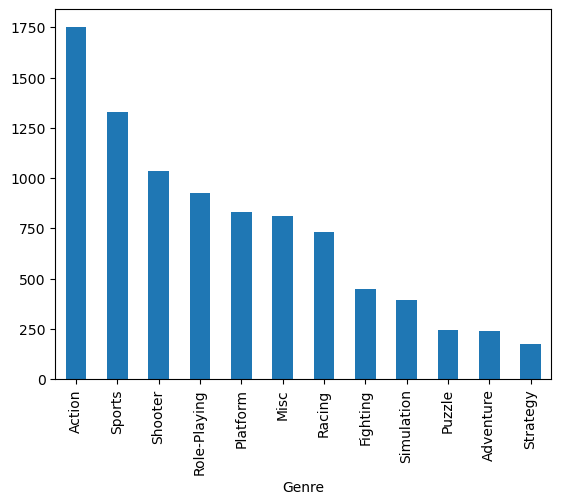

In [9]:
global_sales_chart = top_selling_genre.plot(kind = 'bar')

4. Calculate the average global sales for each ``Publisher``

    Store the resulting dataframe in the variable ``avg_sales_per_publisher``.

In [10]:
avg_sales_per_publisher = games_sales_df.groupby(['Publisher'])['Global_Sales'].mean().reset_index()
avg_sales_per_publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111
...,...,...
573,id Software,0.030000
574,imageepoch Inc.,0.020000
575,inXile Entertainment,0.100000
576,"mixi, Inc",0.860000


5. Calculate the total ``EU_Sales`` for each platform-year combination

    Store the resulting series in the variable ``platform_year_eu_sales``.

In [11]:
platform_year_eu_sales = games_sales_df.groupby(['Platform', 'Year'])['EU_Sales'].sum()
platform_year_eu_sales

Platform  Year  
2600      1980.0     0.67
          1981.0     1.96
          1982.0     1.65
          1983.0     0.34
          1984.0     0.01
                    ...  
XB        2008.0     0.04
XOne      2013.0     5.29
          2014.0    17.75
          2015.0    17.98
          2016.0     4.63
Name: EU_Sales, Length: 241, dtype: float64

6. Find the number of publishers in each ``Platform``

    Calculate the number of publishers within each "Platform" and store the resultant dataframe in the variable ``no_publisher_per_platform``. The "Publishers_Count" column in ``no_publisher_per_platform`` should store the publisher count.

In [12]:
no_publisher_per_platform = games_sales_df.groupby(['Platform'])['Publisher'].nunique().reset_index(name = 'Publishers_Count')#.rename(columns={'Publisher':'Publishers_Count'})
no_publisher_per_platform

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


Otra solución

In [13]:
games_sales_df.groupby('Platform')['Publisher'].apply(lambda x: x.nunique()).reset_index(name='Publishers_Count')

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


7. Find the publisher with the most occurences for each ``Platform``

    Store the resulting dataframe in the variable ``most_frequent_publisher_platform``.

    Note: return the publisher with the smallest lexicographical name in case there is a tie in the number of occurences.

In [14]:
most_frequent_publisher_platform = games_sales_df.groupby('Platform')['Publisher'].agg(lambda x: x.mode().min()).reset_index()
most_frequent_publisher_platform

,Platform,Publisher
0,2600,Atari
1,3DO,Imageworks
2,3DS,Namco Bandai Games
3,DC,Sega
4,DS,Ubisoft
5,GB,Nintendo
6,GBA,THQ
7,GC,Electronic Arts
8,GEN,Sega
9,GG,Sega


8. Find the publisher with the highest total global sales for each ``Year``

    Store the resulting dataframe in the variable ``top_publisher_year``.

In [15]:
top_publisher_year = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index().sort_values(['Year', 'Global_Sales'], ascending = True).drop_duplicates('Year',keep='last').reset_index(drop= True)
top_publisher_year.rename(columns={'Publisher':'Top_Selling_Publisher','Global_Sales':'Global_Sales_Sum'}, inplace = True)

Otra solución

In [16]:
yearly_publisher_sales = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum()
yearly_publisher_sales

Year    Publisher                   
1980.0  Activision                      3.02
        Atari                           8.36
1981.0  20th Century Fox Video Games    1.35
        Activision                      8.50
        Atari                           8.45
                                        ... 
2016.0  Yeti                            0.02
        dramatic create                 0.03
2017.0  Idea Factory                    0.01
        Sega                            0.04
2020.0  Ubisoft                         0.29
Name: Global_Sales, Length: 2321, dtype: float64

In [17]:
top_publisher_year = yearly_publisher_sales.groupby('Year').idxmax().apply(lambda x: x[1]).reset_index(name='Top_Selling_Publisher')
top_publisher_year

,Year,Top_Selling_Publisher
0,1980.0,Atari
1,1981.0,Activision
2,1982.0,Atari
3,1983.0,Nintendo
4,1984.0,Nintendo
5,1985.0,Nintendo
6,1986.0,Nintendo
7,1987.0,Nintendo
8,1988.0,Nintendo
9,1989.0,Nintendo


In [18]:
top_publisher_year['Global_Sales_Sum'] = top_publisher_year.apply(lambda row: yearly_publisher_sales.loc[row['Year'], row['Top_Selling_Publisher']], axis=1)

In [19]:
top_publisher_year

,Year,Top_Selling_Publisher,Global_Sales_Sum
0,1980.0,Atari,8.36
1,1981.0,Activision,8.50
2,1982.0,Atari,19.43
3,1983.0,Nintendo,10.96
4,1984.0,Nintendo,45.56
5,1985.0,Nintendo,49.95
6,1986.0,Nintendo,16.18
7,1987.0,Nintendo,11.95
8,1988.0,Nintendo,36.44
9,1989.0,Nintendo,63.88


9. Find the maximum sales year for each ``Genre``

    Store the resulting dataframe in the variable ``max_sales_year_per_genre``.

In [16]:
genre = games_sales_df.groupby(['Genre', 'Year'])['Global_Sales'].max().reset_index()
max_sales_year_per_genre = genre.sort_values(['Genre','Global_Sales'], ascending=True).drop_duplicates('Genre', keep='last')
max_sales_year_per_genre = max_sales_year_per_genre.sort_values('Global_Sales', ascending=False).reset_index(drop = True)
max_sales_year_per_genre

,Genre,Year,Global_Sales
0,Sports,2006.0,82.74
1,Platform,1985.0,40.24
2,Racing,2008.0,35.82
3,Role-Playing,1996.0,31.37
4,Puzzle,1989.0,30.26
5,Misc,2006.0,29.02
6,Shooter,1984.0,28.31
7,Simulation,2005.0,24.76
8,Action,2013.0,21.40
9,Fighting,2008.0,13.04


Otra solución

In [17]:
max_sales_year_per_genre = games_sales_df.groupby('Genre')['Global_Sales'].idxmax()
max_sales_year_per_genre = games_sales_df.loc[max_sales_year_per_genre, ['Genre', 'Year', 'Global_Sales']]
max_sales_year_per_genre

,Genre,Year,Global_Sales
16,Action,2013.0,21.40
50,Adventure,1992.0,11.18
39,Fighting,2008.0,13.04
7,Misc,2006.0,29.02
1,Platform,1985.0,40.24
5,Puzzle,1989.0,30.26
2,Racing,2008.0,35.82
4,Role-Playing,1996.0,31.37
9,Shooter,1984.0,28.31
10,Simulation,2005.0,24.76


10. Compute descriptive statistics for each Genre using its ``Global_Sales``

    Store the resulting dataframe in the variable ``descriptive_genres``.

In [18]:
descriptive_genres = games_sales_df.groupby('Genre')['Global_Sales'].describe()
descriptive_genres

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


11. Calculate the total ``JP_Sales`` and average ``Other_Sales`` for each Platform

    Store the resulting dataframe in the variable ``jp_other_sales_platform``.

In [19]:
jp_other_sales_platform = games_sales_df.groupby('Platform').agg({'JP_Sales':'sum', 'Other_Sales':'mean'})
jp_other_sales_platform 

,JP_Sales,Other_Sales
Platform,,
2600,0.00,0.006842
3DO,0.10,0.000000
3DS,97.35,0.024813
DC,8.56,0.005192
DS,175.57,0.027984
GB,85.12,0.083673
GBA,47.33,0.009404
GC,21.58,0.009317
GEN,2.67,0.032963


12. Calculate the range (max-min) of ``NA_Sales`` for each ``Publisher``

    Store the resulting series in the variable ``max_min_diff_NAsales_per_publisher``.

In [20]:
def _range(series):
    return series.max() - series.min()

max_min_diff_NAsales_per_publisher = games_sales_df.groupby('Publisher')['NA_Sales'].agg(_range)
max_min_diff_NAsales_per_publisher

Publisher
10TACLE Studios                 0.06
1C Company                      0.01
20th Century Fox Video Games    0.53
2D Boy                          0.00
3DO                             1.09
                                ... 
id Software                     0.00
imageepoch Inc.                 0.00
inXile Entertainment            0.00
mixi, Inc                       0.00
responDESIGN                    0.05
Name: NA_Sales, Length: 578, dtype: float64

13. Calculate the percentage of ``Global_Sales`` contribution by each ``Platform``

    Store the resulting dataframe in the variable ``sales_percentage_by_platform``.

In [21]:
games_sales_df.groupby('Platform')['Global_Sales'].sum()

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

In [22]:
sales_percentage_by_platform = games_sales_df.groupby('Platform').agg(sales_percentage = ('Global_Sales', 'sum')).reset_index()
sales_percentage_by_platform['sales_percentage'] = sales_percentage_by_platform['sales_percentage'] / games_sales_df['Global_Sales'].sum() * 100
sales_percentage_by_platform

,Platform,sales_percentage
0,2600,1.088287
1,3DO,0.001121
2,3DS,2.774078
3,DC,0.179027
4,DS,9.220285
5,GB,2.863648
6,GBA,3.570452
7,GC,2.234867
8,GEN,0.317922
9,GG,0.000448


Otra solución

In [23]:
sales_by_platform = games_sales_df.groupby('Platform')['Global_Sales'].sum()
sales_percentage_by_platform = sales_by_platform.apply(lambda x: (x/sales_by_platform.sum())*100).reset_index(name='sales_percentage')

14. Which platforms for playing video games have been the most popular each year?

    Store the resulting series in the variable ``popular_platform_per_year``.

In [24]:
yearly_platform_sales = games_sales_df.groupby(['Year', 'Platform'])['Global_Sales'].sum()
top_platform_year = yearly_platform_sales.groupby('Year').idxmax().apply(lambda x: x[1])
top_platform_year

Year
1980.0    2600
1981.0    2600
1982.0    2600
1983.0     NES
1984.0     NES
1985.0     NES
1986.0     NES
1987.0     NES
1988.0     NES
1989.0      GB
1990.0    SNES
1991.0    SNES
1992.0    SNES
1993.0    SNES
1994.0    SNES
1995.0      PS
1996.0      PS
1997.0      PS
1998.0      PS
1999.0      PS
2000.0      PS
2001.0     PS2
2002.0     PS2
2003.0     PS2
2004.0     PS2
2005.0     PS2
2006.0     Wii
2007.0     Wii
2008.0     Wii
2009.0     Wii
2010.0    X360
2011.0     PS3
2012.0     PS3
2013.0     PS3
2014.0     PS4
2015.0     PS4
2016.0     PS4
2017.0     PS4
2020.0      DS
Name: Global_Sales, dtype: object

15. Which genres have been more or less popular with the passing of time?

    Store the resulting dataframe in the variable ``genre_popularity_over_time``.

In [25]:
genre_popularity_over_time = games_sales_df.groupby(['Year', 'Genre'])['Genre'].count().unstack(fill_value = 0)
genre_popularity_over_time

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0
1985.0,2,0,1,0,4,4,0,0,1,1,1,0
1986.0,6,0,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,0,2,0,0,3,2,0,4,0
1988.0,2,0,0,0,4,1,1,3,1,1,2,0


16. Calculate the z-score normalization for ``Global_Sales`` for each ``Genre``

    Store the result in a new column ``Global_Sales_Normalized`` in the original dataframe ``games_sales_df``.

In [29]:
zscore = lambda x: (x - x.mean()) / x.std()

t = games_sales_df.groupby('Genre')['Global_Sales'].transform(zscore)

games_sales_df['Global_Sales_Normalized'] = t

t

0        39.322418
1        15.202241
2        21.194126
3        15.520139
4        18.002581
           ...    
16593    -0.359091
16594    -0.430254
16595    -0.346540
16596    -0.263093
16597    -0.359091
Name: Global_Sales, Length: 16598, dtype: float64

In [28]:
games_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Normalized
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,39.322418
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,15.202241
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,21.194126
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.520139
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,18.002581
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,-0.359091
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,-0.430254
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,-0.346540
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,-0.263093


# Practice PivotTables and Crosstab with Student Grades data

In this project, students will explore essential concepts and techniques in data analysis using Pandas Pivot Table and CrossTab. They will cover the following topics:

1. Simple Pivot Tables: Grouping data based on an index column.
2. Index, Columns, and Values: Adding columns and values to gain deeper insights.
3. Different Types of Functions: Applying various aggregation functions.
4. Fill Values: Handling missing data in Pivot Tables.
5. Pivot Tables with Margins: Including row and column totals.
6. CrossTab: Utilizing a simpler alternative for specific scenarios.

Through hands-on activities, students will develop the skills to perform effective data analysis and make informed decisions using Pandas.

### The Dataset used

For this project we wil use students records dataset. The dataset contains information about students' academic performance and personal attributes. The dataset includes various features such as school, sex, age, address, family size, parental education levels, study time, travel time, failures, extracurricular activities, internet access, romantic relationships, health status, absences, and grades in different subjects (G1, G2, G3).

### Analysis and activities

Your job will be to practice wrangling these different datframes to answer questions about students.

Start the associated lab, go over the Reading and Analysis parts of the notebook, and once you're ready, jump to the activities!

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Reading the dataset as a dataframe# Reading the dataframe
student_mat_df = pd.read_csv("files/student-mat.csv")

In [3]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Show the number of students in each school
print("Number of students in GP: ", student_mat_df[student_mat_df['school'] == 'GP'].size)

print("Number of students in MS: ", student_mat_df[student_mat_df['school'] == 'MS'].size)

Number of students in GP:  11517
Number of students in MS:  1518


In [5]:
student_mat_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

1. Calculate the average G1 grade by mother job (``Mjob``).

    Store the resulting dataframe in the variable ``pivot_table_g1_by_Mjob``.

In [6]:
pivot_table_g1_by_Mjob = pd.pivot_table(student_mat_df,    
                                        index = ['Mjob'],
                                        values= ['G1']
                                        )
                                        

pivot_table_g1_by_Mjob

,G1
Mjob,
at_home,10.457627
health,12.205882
other,10.177305
services,11.388350
teacher,11.534483


2. Calculate the average G2 grade by school and sex.

    Store the resulting dataframe in the variable ``pivot_table_avg_g2_by_school_sex``.

In [7]:
pivot_table_avg_g2_by_school_sex = pd.pivot_table(student_mat_df,
                                                  values = 'G2',
                                                  columns = 'sex',
                                                  index = 'school')
pivot_table_avg_g2_by_school_sex

sex,F,M
school,,
GP,10.398907,11.204819
MS,10.320000,10.047619


3. Calculate the maximum G3 grade by age.

    Store the resulting dataframe in the variable ``pivot_table_max_g3_by_age``.

In [8]:
pivot_table_max_g3_by_age = pd.pivot_table(student_mat_df,
                                                  values = 'G3',
                                                  index = 'age',
                                                  aggfunc = 'max')
pivot_table_max_g3_by_age

,G3
age,
15,19
16,20
17,18
18,19
19,13
20,18
21,7
22,8


4. Calculate the average health (``health``) by family size (``famsize``) and fill missing values with ``0``.

    Store the resulting dataframe in the variable ``pivot_table_avg_g1_by_famsize``.

In [9]:
pivot_table_avg_g1_by_famsize = pd.pivot_table(student_mat_df,
                                               values = 'health',
                                               index = 'famsize',
                                               fill_value = 0)
pivot_table_avg_g1_by_famsize

,health
famsize,
GT3,3.580071
LE3,3.491228


5. Calculate the average G2 grade by school and include row and column totals.

    Store the resulting dataframe in the variable ``pivot_table_avg_g2_by_school``.

In [10]:
pivot_table_avg_g2_by_school = student_mat_df.pivot_table(index = 'school',
                                                          values = 'G2',
                                                          margins = True)
pivot_table_avg_g2_by_school                                                          

,G2
school,
GP,10.782235
MS,10.195652
All,10.713924


6. Calculate the average free time ``freetime`` indexing school wiht sex and age columns

    Store the resulting dataframe in the variable ``pivot_table_avg_freetime_by_school_sex_age``.

    - Note: fill missing values with ``0``.

In [11]:
pivot_table_avg_freetime_by_school_sex_age = student_mat_df.pivot_table(values='freetime',
                                                                        index = 'school',
                                                                        columns = ['sex', 'age'],
                                                                        fill_value = 0)

pivot_table_avg_freetime_by_school_sex_age

sex            F                                                  M        \
age           15        16    17        18        19   20        15    16   
school                                                                      
GP      2.921053  3.092593  2.94  3.172414  2.833333  0.0  3.590909  3.38   
MS      0.000000  0.000000  3.25  2.785714  3.000000  4.0  0.000000  0.00   

sex                                                  
age           17        18        19   20   21   22  
school                                               
GP      3.472222  3.142857  4.166667  5.0  0.0  4.0  
MS      4.500000  3.363636  3.250000  5.0  5.0  0.0

7. Calculate the average absences by school and address.

    Store the resulting dataframe in the variable ``pivot_table_avg_absences_by_school_address``.

In [13]:
pivot_table_avg_absences_by_school_address = student_mat_df.pivot_table(index = ['school', 'address'],
                                                                        values = 'absences')
pivot_table_avg_absences_by_school_address

absences
school address          
GP     R        6.698413
       U        5.804196
MS     R        4.680000
       U        2.666667

8. Calculate the average freetime and number of absences by school.

    Store the resulting dataframe in the variable ``pivot_table_avg_freetime_absences_by_school``.

    Your result should look similar to this dataframe:

In [17]:
pivot_table_avg_freetime_absences_by_school = student_mat_df.pivot_table(index = 'school',
                                                                         values = ['absences', 'freetime'],
                                                                         aggfunc = {'absences' : 'sum', 'freetime' : 'mean'})
pivot_table_avg_freetime_absences_by_school

,absences,freetime
school,,
GP,2082,3.223496
MS,173,3.326087


9. Calculate the sum of absences by guardian.

    Store the resulting dataframe in the variable ``pivot_table_sum_absences_by_guardian``.

In [18]:
pivot_table_sum_absences_by_guardian = student_mat_df.pivot_table(index = 'guardian',
                                                                 values = 'absences',
                                                                 aggfunc = 'sum')

pivot_table_sum_absences_by_guardian

,absences
guardian,
father,358
mother,1593
other,304


10. Calculate the average G1 grade by school.

    Store the resulting dataframe in the variable ``pivot_table_avg_g1_by_school``.

In [20]:
pivot_table_avg_g1_by_school = student_mat_df.pivot_table(index = 'school',
                                                          values = 'G1')
pivot_table_avg_g1_by_school                                                          

,G1
school,
GP,10.939828
MS,10.673913


11. Count the number of students by guardian and age and include sex as column.

    Store the resulting dataframe in the variable ``cross_tab_students_by_guardian_age_sex``.

In [32]:
cross_tab_students_by_guardian_age_sex = student_mat_df.pivot_table(index = ['guardian', 'age'],
                                                                    columns = ['sex'],
                                                                    values = 'school',
                                                                    aggfunc = 'count',
                                                                    fill_value = 0
                                                                    )

cross_tab_students_by_guardian_age_sex

sex            F   M
guardian age        
father   15   11  13
         16    9  14
         17   15  10
         18    8   8
         19    0   2
mother   15   26  29
         16   44  35
         17   43  29
         18   31  31
         19    1   3
         22    0   1
other    15    1   2
         16    1   1
         17    0   1
         18    4   0
         19   13   5
         20    1   2
         21    0   1

Usando ``crosstab`` sería así:

In [33]:
cross_tab_students_by_guardian_age_sex = pd.crosstab(
    index=[student_mat_df['guardian'], student_mat_df['age']],   # Index columns (school and age)
    columns=student_mat_df['sex'],                             # Column column (sex)
    rownames=['Guardian', 'Age'],                                 # Names for the index
    colnames=['Sex'],                                           # Name for the columns
    margins=False                                               # Exclude row and column totals
)

cross_tab_students_by_guardian_age_sex


Sex            F   M
Guardian Age        
father   15   11  13
         16    9  14
         17   15  10
         18    8   8
         19    0   2
mother   15   26  29
         16   44  35
         17   43  29
         18   31  31
         19    1   3
         22    0   1
other    15    1   2
         16    1   1
         17    0   1
         18    4   0
         19   13   5
         20    1   2
         21    0   1

12. Count the number of students by school, and include sex and age as columns and include row and column totals.

    Store the resulting dataframe in the variable ``cross_tab_students_by_school_sex_age``.

In [39]:
cross_tab_students_by_school_sex_age = pd.crosstab(
    index = student_mat_df['school'],
    columns = [student_mat_df['sex'], student_mat_df['age']],
    rownames = ['School'],
    colnames = ['Sex','Age'],
    margins = True
)

cross_tab_students_by_school_sex_age

Sex      F                      M                           All
Age     15  16  17  18  19 20  15  16  17  18  19 20 21 22     
School                                                         
GP      38  54  50  29  12  0  44  50  36  28   6  1  0  1  349
MS       0   0   8  14   2  1   0   0   4  11   4  1  1  0   46
All     38  54  58  43  14  1  44  50  40  39  10  2  1  1  395

13. Calculate the average travel time (``traveltime``) by address, sex, and age.

    Store the resulting dataframe in the variable ``crosstab_avg_traveltime_by_address_sex_age``.

In [61]:
crosstab_avg_traveltime_by_address_sex_age = pd.crosstab(
    index = [student_mat_df['address'],student_mat_df['sex'],student_mat_df['age']],
    values = student_mat_df['traveltime'],
    columns = '',
    rownames = ['Address', 'Sex', 'Age'],
    colnames = [''],
    aggfunc = 'mean')

crosstab_avg_traveltime_by_address_sex_age

Address Sex Age          
R       F   15   1.555556
            16   1.333333
            17   1.600000
            18   2.285714
            19   1.000000
        M   15   2.166667
            16   1.875000
            17   2.166667
            18   1.846154
            19   2.250000
            21   1.000000
U       F   15   1.275862
            16   1.333333
            17   1.255814
            18   1.344828
            19   1.454545
            20   2.000000
        M   15   1.263158
            16   1.404762
            17   1.392857
            18   1.346154
            19   1.166667
            20   1.000000
            22   1.000000

14. Count the number of students who have participated in extracurricular activities by school and sex.

    Store the resulting dataframe in the variable ``crosstab_activities_by_school_sex``.

In [76]:
crosstab_activities_by_school_sex  = pd.crosstab(
    index = [student_mat_df['school'],student_mat_df['sex']],
    rownames = ['School', 'Sex'],
    values = student_mat_df['activities'],
    columns = '',
    colnames = [''],
    aggfunc = lambda x: (x == 'yes').sum(),
    margins=False

)

crosstab_activities_by_school_sex 

School Sex    
GP     F    86
       M    99
MS     F    10
       M     6

15. Calculate the percentage of students who have internet access, categorized by school and sex.

    Store the resulting dataframe in the variable ``crosstab_internet_access_by_school_sex``.

In [97]:
crosstab_internet_access_by_school_sex = pd.crosstab(
    index = student_mat_df['school'],
    rownames = ['School'],
    values = student_mat_df['internet'],
    columns = student_mat_df['sex'],
    aggfunc = lambda x: (x == 'yes').sum() / len(x)
)

crosstab_internet_access_by_school_sex

sex,F,M
School,,
GP,0.836066,0.867470
MS,0.680000,0.714286


# Practice GroupBy operations with Netflix data

## Introduction

In this project, students will learn essential concepts and techniques for data analysis using grouping in Pandas. Specifically, they will explore:

- Grouping by a single column and performing operations such as ``mean``, ``size``, and ``std``.
- Grouping by multiple columns to gain insights from combined factors.
- Applying built-in functions to aggregate data in different ways for different columns using ``.agg()`` or ``.aggregate()``.
- Implementing and using custom-defined functions to perform advanced calculations on grouped data.
- Utilizing ``.apply()`` to apply custom functions and construct DataFrames from the resulting series.
- Employing ``.transform()`` to apply transformations on grouped data.

By mastering these concepts, students will gain a solid foundation in using Pandas for effective data analysis and manipulation.

**The Dataset used**

For this project we wil use The Netflix TV Shows and Movies dataset. The Netflix TV Shows and Movies dataset is a comprehensive collection of information about TV shows and movies available on the popular streaming platform Netflix. The dataset provides details about each title, including details such as type, description, release year, genres, ratings, and more. With thousands of entries, this dataset offers a rich source of information for exploring and analyzing the vast variety of content available on Netflix.

In [98]:
import pandas as pd

In [99]:
# Reading dataframe
titles_df = pd.read_csv("files/titles.csv")

In [100]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [106]:
# Show the number of movies and shows
print("Number of movies and shows: ", len(titles_df))

# Show the first year Netflix produced a movie or a show
print("The first time Netflix  produced a movie or a show was in: ", titles_df['release_year'][0])



Number of movies and shows:  5850
The first time Netflix  produced a movie or a show was in:  1945


In [102]:
titles_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

## Cleaning

1. Drop records where the ``imdb_score`` column has missing values (NaN)

In [107]:
titles_df.dropna(subset='imdb_score', inplace=True)

2. For each TV show or movie which has NaN value in the age certification column, replace it to be 'No certification'

In [109]:
titles_df['age_certification'].fillna(value = 'No certification', inplace = True)

3. For each TV show or movie which has NaN value in the seasons column, replace it to be the most occured value in the seasons

In [110]:
titles_df['seasons'].fillna(value = 1.0 , inplace = True)

4. Count the number of movies or TV shows for each age certification

    Store the resulting dataframe in the variable ``certification_counts``.

In [116]:
certification_counts = titles_df.groupby(['age_certification'])['id'].count().reset_index().rename(columns= {'id' : 'count'})
certification_counts

,age_certification,count
0,G,99
1,NC-17,15
2,No certification,2335
3,PG,223
4,PG-13,435
5,R,530
6,TV-14,441
7,TV-G,75
8,TV-MA,833
9,TV-PG,173


In [118]:
titles_df.groupby("age_certification").size().reset_index(name="count")

,age_certification,count
0,G,99
1,NC-17,15
2,No certification,2335
3,PG,223
4,PG-13,435
5,R,530
6,TV-14,441
7,TV-G,75
8,TV-MA,833
9,TV-PG,173


5. Count the number of movies and TV shows (seperately) produced in each release year

    Store the resulting dataframe in the variable ``count_by_release_year``.

In [121]:
count_by_release_year = titles_df.groupby(['release_year', 'type']).size().reset_index(name = 'count')
count_by_release_year

,release_year,type,count
0,1954,MOVIE,2
1,1956,MOVIE,1
2,1958,MOVIE,1
3,1959,MOVIE,1
4,1960,MOVIE,1
...,...,...,...
97,2020,SHOW,257
98,2021,MOVIE,429
99,2021,SHOW,289
100,2022,MOVIE,180


6. Calculate the average runtime and imdb score of movies and TV shows for each release year

    Store the resulting dataframe in the variable ``average_duration_imdb_score``.

In [131]:
average_duration_imdb_score = titles_df.groupby('release_year').agg({'runtime' : 'mean','imdb_score' : 'mean' }).reset_index()

average_duration_imdb_score

,release_year,runtime,imdb_score
0,1954,107.500000,7.450000
1,1956,120.000000,6.700000
2,1958,77.000000,7.500000
3,1959,142.000000,6.600000
4,1960,158.000000,6.400000
...,...,...,...
57,2018,75.150273,6.502186
58,2019,75.697861,6.518316
59,2020,74.625551,6.316300
60,2021,74.990251,6.302089


7. Count the number of movies and TV shows for each genre

    Store the resulting dataframe in the variable ``genre_counts.``

    Note: you have to explode the genres column first.